In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
#read the data to Python
data= pd.read_excel('/content/Dry_Bean_Dataset_N.xlsx')

In [ ]:
data.isnull().sum()

Area                86
Perimeter          188
MajorAxisLength      0
MinorAxisLength     32
AspectRation         0
Eccentricity        39
ConvexArea           0
EquivDiameter       19
Extent              10
Solidity             5
roundness          102
Compactness          0
ShapeFactor1       109
ShapeFactor2        32
ShapeFactor3         0
ShapeFactor4         0
Class                0
dtype: int64

In [ ]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
#checking the rows duplicate
data[data.duplicated()]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518.0,NaN,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954.0,NaN,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427.0,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891.0,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804.0,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,63408.0,1005.966,412.551649,196.337705,2.101235,0.879494,64200,284.136539,0.798791,0.987664,0.787385,0.688730,0.006506,0.000903,0.474348,0.996718,HOROZ
7278,63882.0,1004.206,411.263403,198.765453,2.069089,0.875452,64663,285.196579,0.754705,0.987922,0.796054,0.693465,0.006438,0.000918,0.480893,0.995010,HOROZ
7285,63948.0,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7340,65766.0,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ


In [ ]:
#droping duplicate columns
data.drop_duplicates(inplace=True)

In [ ]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

**1. Find and replace the missing values in Class Type 'BARBUNYA'**

In [ ]:
#create a subset of BARBUNYA class of seeds
subset_condition_BARBUNYA = data['Class']=='BARBUNYA'

In [ ]:
data_BARBUNYA_class = data.loc[subset_condition_BARBUNYA]

In [ ]:
#Number of rows missing in class BARBUNYA
data_BARBUNYA_class.isnull().sum()

Area               20
Perimeter          18
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity       10
ConvexArea          0
EquivDiameter       0
Extent              0
Solidity            0
roundness          10
Compactness         0
ShapeFactor1        5
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
Class               0
dtype: int64

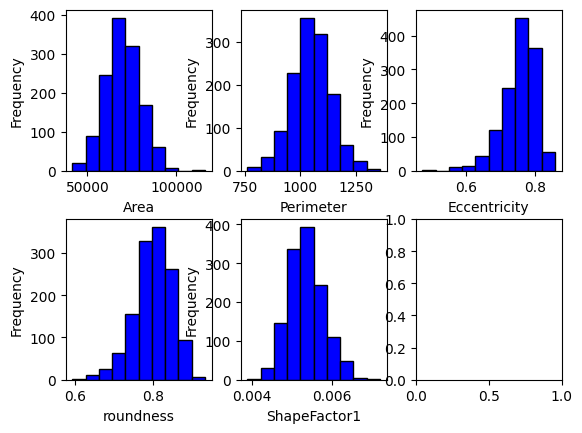

In [ ]:
#plotting the histogram of the coumns which are having null values
barbunya_col = ['Area','Perimeter','Eccentricity','roundness','ShapeFactor1']
fig, axes = plt.subplots(nrows=2, ncols=3)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(barbunya_col):
  axes[i].hist(data_BARBUNYA_class[col], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

In [ ]:
#fill the missing values in Area,Perimeter,ShapeFactor column of Barbunya class with the mean values as distribution is normal
data.loc[subset_condition_BARBUNYA, 'Area'] = data_BARBUNYA_class['Area'].fillna(data_BARBUNYA_class['Area'].mean())
data.loc[subset_condition_BARBUNYA,'Perimeter'] = data_BARBUNYA_class['Perimeter'].fillna(data_BARBUNYA_class['Perimeter'].mean())
data.loc[subset_condition_BARBUNYA,'ShapeFactor1'] = data_BARBUNYA_class['ShapeFactor1'].fillna(data_BARBUNYA_class['ShapeFactor1'].mean())
#fill the missing values in roundness,Eccentricity column of Barbunya class with the median values as distribution is skewed
data.loc[subset_condition_BARBUNYA,'roundness'] = data_BARBUNYA_class['roundness'].fillna(data_BARBUNYA_class['roundness'].median())
data.loc[subset_condition_BARBUNYA,'Eccentricity'] = data_BARBUNYA_class['Eccentricity'].fillna(data_BARBUNYA_class['Eccentricity'].median())


In [ ]:
#checking the null values after filling
data_BARBUNYA_class = data.loc[subset_condition_BARBUNYA]
data_BARBUNYA_class.isnull().sum()


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

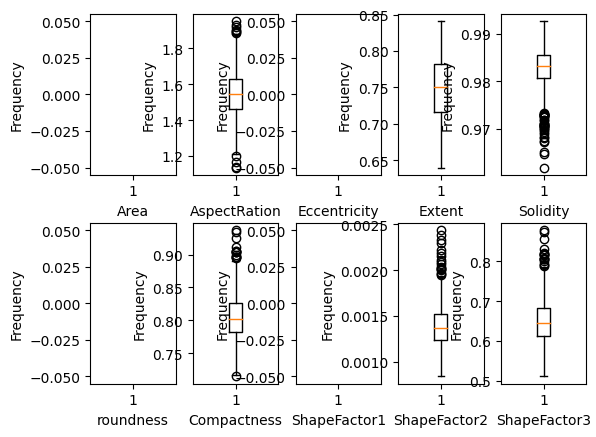

In [ ]:
column = ['Area', 'AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3']
fig, axes = plt.subplots(nrows=2, ncols=5)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(column):
  axes[i].boxplot(x=data_BARBUNYA_class[col])
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)


**2.Find and replace the missing values in Class Type 'SEKER'**

In [ ]:
subset_condition_SEKER= data['Class']=='SEKER'
subset_SEKER = data.loc[subset_condition_SEKER]

In [ ]:
subset_SEKER.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

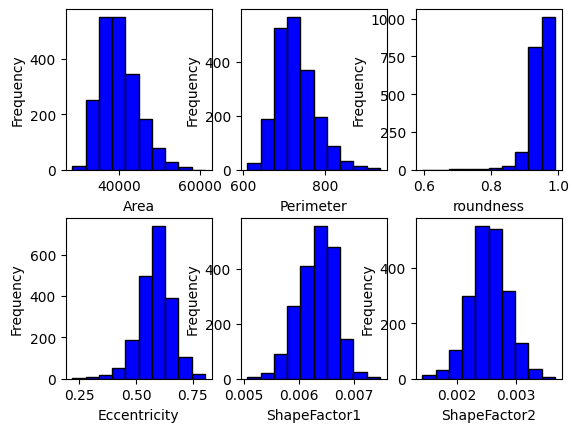

In [ ]:
seker_col = ['Area','Perimeter','roundness','Eccentricity','ShapeFactor1','ShapeFactor2']
# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(seker_col):
  axes[i].hist(subset_SEKER[col], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

In [ ]:
#fill the missing values in Area,Perimeter,roundness,ShapeFactor1 column of Seker class with the median values as distribution is skewed
data.loc[subset_condition_SEKER, 'Area']= subset_SEKER['Area'].fillna(subset_SEKER['Area'].median())
data.loc[subset_condition_SEKER, 'Perimeter'] = subset_SEKER['Perimeter'].fillna(subset_SEKER['Perimeter'].median())
data.loc[subset_condition_SEKER, 'roundness'] = subset_SEKER['roundness'].fillna(subset_SEKER['roundness'].median())
data.loc[subset_condition_SEKER, 'Eccentricity'] = subset_SEKER['Eccentricity'].fillna(subset_SEKER['Eccentricity'].median())
data.loc[subset_condition_SEKER, 'ShapeFactor1'] = subset_SEKER['ShapeFactor1'].fillna(subset_SEKER['ShapeFactor1'].median())
#fill the missing values in ShapeFactor2 column of Seker class with the mean values as distribution is normal
data.loc[subset_condition_SEKER, 'ShapeFactor2'] = subset_SEKER['ShapeFactor2'].fillna(subset_SEKER['ShapeFactor2'].mean())

In [ ]:
#checking the null values after filling
subset_SEKER = data.loc[subset_condition_SEKER]
subset_SEKER.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

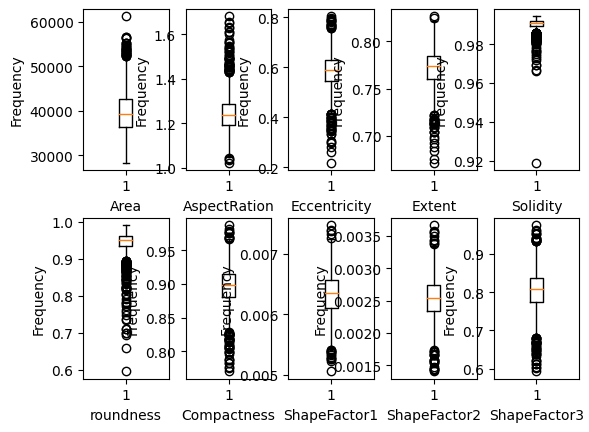

In [ ]:
column = ['Area', 'AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3']
fig, axes = plt.subplots(nrows=2, ncols=5)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(column):
  axes[i].boxplot(x=subset_SEKER[col])
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

**4.Find and replace the missing values in Class Type 'BOMBAY'**

In [ ]:
subset_condition_BOMBAY = data['Class']=='BOMBAY'
subset_BOMBAY = data.loc[subset_condition_BOMBAY]

In [ ]:
subset_BOMBAY.isnull().sum()

Area               10
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        7
ConvexArea          0
EquivDiameter       5
Extent              0
Solidity            5
roundness           0
Compactness         0
ShapeFactor1        6
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
Class               0
dtype: int64

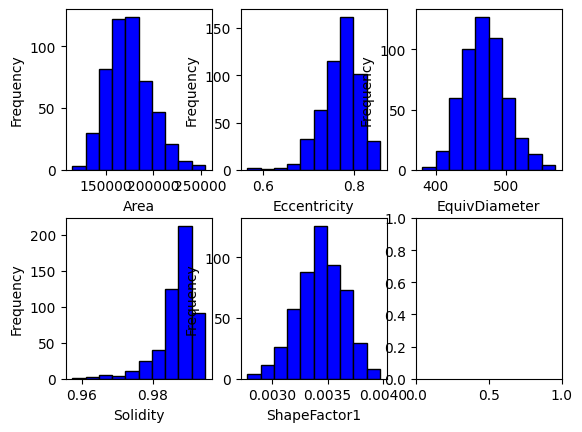

In [ ]:
bombay_col = ['Area','Eccentricity','EquivDiameter','Solidity','ShapeFactor1']
# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(bombay_col):
  axes[i].hist(subset_BOMBAY[col], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

In [ ]:
#fill the missing values in Area,Solidity,Eccentricity, column of Bombay class with the mean values as distribution is skewed
data.loc[subset_condition_BOMBAY, 'Area']= subset_BOMBAY['Area'].fillna(subset_BOMBAY['Area'].median())
data.loc[subset_condition_BOMBAY, 'Solidity']= subset_BOMBAY['Solidity'].fillna(subset_BOMBAY['Solidity'].median())
data.loc[subset_condition_BOMBAY, 'Eccentricity'] = subset_BOMBAY['Eccentricity'].fillna(subset_BOMBAY['Eccentricity'].median())
#fill the missing values in EquivDiameter,ShapeFactor1 column of Bombay class with the median values as distribution is normal
data.loc[subset_condition_BOMBAY, 'EquivDiameter'] = subset_BOMBAY['EquivDiameter'].fillna(subset_BOMBAY['EquivDiameter'].mean())
data.loc[subset_condition_BOMBAY, 'ShapeFactor1'] = subset_BOMBAY['ShapeFactor1'].fillna(subset_BOMBAY['ShapeFactor1'].mean())

In [ ]:
#checking the null values after filling
subset_BOMBAY = data.loc[subset_condition_BOMBAY]
subset_BOMBAY.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

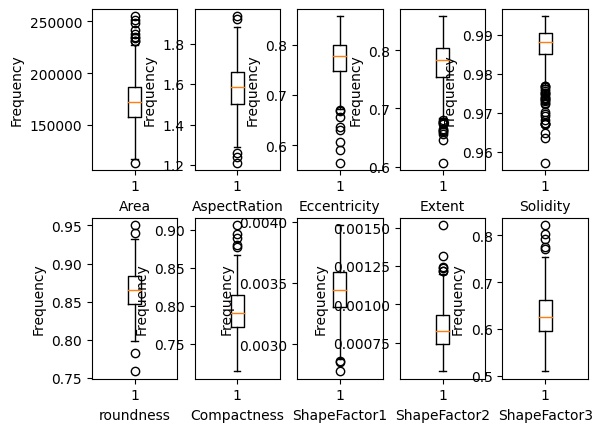

In [ ]:
column = ['Area', 'AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3']
fig, axes = plt.subplots(nrows=2, ncols=5)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(column):
  axes[i].boxplot(x=subset_BOMBAY[col])
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

**4.Find and replace the missing values in Class Type 'CALI'**

In [ ]:
subset_condition_CALI = data['Class']=='CALI'
subset_CALI = data.loc[subset_condition_CALI]

In [ ]:
subset_CALI.isnull().sum()

Area               10
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        5
ConvexArea          0
EquivDiameter       0
Extent              0
Solidity            0
roundness           0
Compactness         0
ShapeFactor1        8
ShapeFactor2       14
ShapeFactor3        0
ShapeFactor4        0
Class               0
dtype: int64

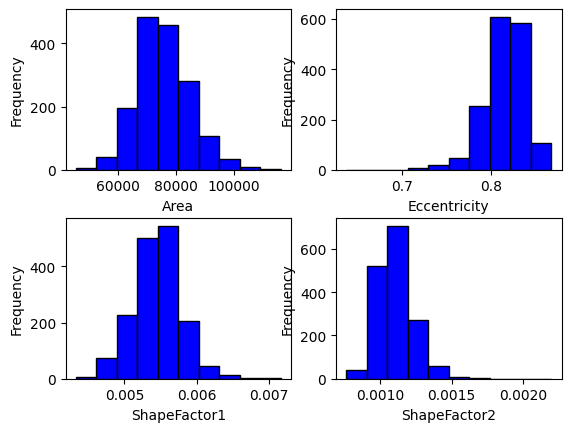

In [ ]:
cali_col = ['Area','Eccentricity','ShapeFactor1','ShapeFactor2']
# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(cali_col):
  axes[i].hist(subset_CALI[col], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

In [ ]:
#fill the missing values in EccentricityShapeFactor2 column of CALI class with the mean values as distribution is skewed
data.loc[subset_condition_CALI, 'Eccentricity']= subset_CALI['Eccentricity'].fillna(subset_CALI['Eccentricity'].median())
data.loc[subset_condition_CALI, 'ShapeFactor2'] = subset_CALI['ShapeFactor2'].fillna(subset_CALI['ShapeFactor2'].median())
#fill the missing values in Area,ShapeFactor1 column of Bombay class with the median values as distribution is normal
data.loc[subset_condition_CALI, 'Area']= subset_CALI['Area'].fillna(subset_CALI['Area'].mean())
data.loc[subset_condition_CALI,'ShapeFactor1'] = subset_CALI['ShapeFactor1'].fillna(subset_CALI['ShapeFactor1'].mean())

In [ ]:
#checking the null values after filling
subset_CALI = data.loc[subset_condition_CALI]
subset_CALI.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

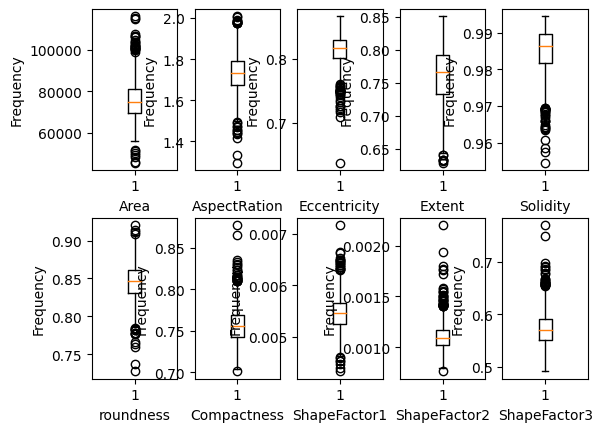

In [ ]:
column = ['Area', 'AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3']
fig, axes = plt.subplots(nrows=2, ncols=5)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(column):
  axes[i].boxplot(x=subset_CALI[col])
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

**5. Find and replace the missing values in Class Type 'HOROZ'**

In [ ]:
subset_condition_HOROZ = data['Class']=='HOROZ'
subset_HOROZ = data.loc[subset_condition_HOROZ]
subset_HOROZ.isnull().sum()

Area                8
Perimeter          30
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        8
ConvexArea          0
EquivDiameter       0
Extent              0
Solidity            0
roundness           0
Compactness         0
ShapeFactor1        6
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
Class               0
dtype: int64

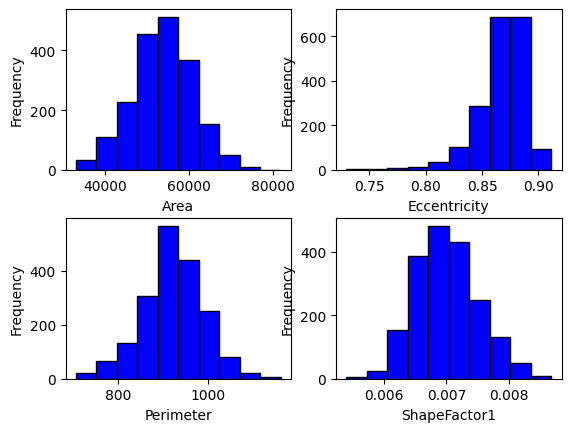

In [ ]:
HOROZ_col = ['Area','Eccentricity','Perimeter','ShapeFactor1']
# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(HOROZ_col):
  axes[i].hist(subset_HOROZ[col], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

In [ ]:
#fill the missing values in Area,Perimeter,ShapeFactor1 column of HOROZ class with the mean values as distribution is normal
data.loc[subset_condition_HOROZ, 'Area']= subset_HOROZ['Area'].fillna(subset_HOROZ['Area'].mean())
data.loc[subset_condition_HOROZ, 'ShapeFactor1']= subset_HOROZ['ShapeFactor1'].fillna(subset_HOROZ['ShapeFactor1'].mean())
data.loc[subset_condition_HOROZ, 'Perimeter'] = subset_HOROZ['Perimeter'].fillna(subset_HOROZ['Perimeter'].mean())
#fill the missing values in Eccentricity of HOROZ class with the median values as distribution is skewed
data.loc[subset_condition_HOROZ,'Eccentricity'] = subset_HOROZ['Eccentricity'].fillna(subset_HOROZ['Eccentricity'].median())

In [ ]:
#checking the null values after filling
subset_HOROZ = data.loc[subset_condition_HOROZ]
subset_HOROZ.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

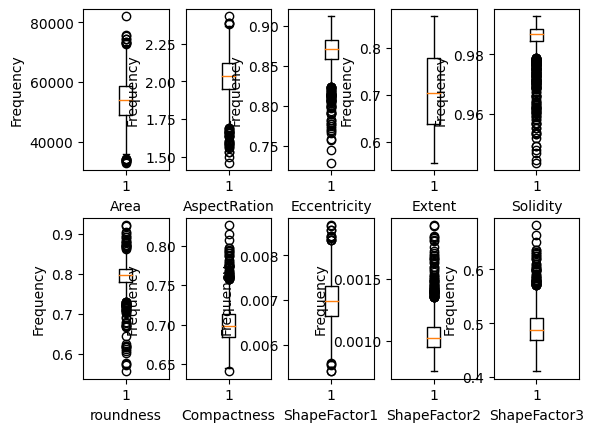

In [ ]:
column = ['Area', 'AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3']
fig, axes = plt.subplots(nrows=2, ncols=5)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(column):
  axes[i].boxplot(x=subset_HOROZ[col])
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

**6.Find and replace the missing values in Class Type 'SIRA'**

In [ ]:
subset_condition_SIRA = data['Class']=='SIRA'
subset_SIRA = data.loc[subset_condition_SIRA]

In [ ]:
subset_SIRA.isnull().sum()

Area               15
Perimeter          97
MajorAxisLength     0
MinorAxisLength    12
AspectRation        0
Eccentricity        0
ConvexArea          0
EquivDiameter      14
Extent              0
Solidity            0
roundness          26
Compactness         0
ShapeFactor1       12
ShapeFactor2       11
ShapeFactor3        0
ShapeFactor4        0
Class               0
dtype: int64

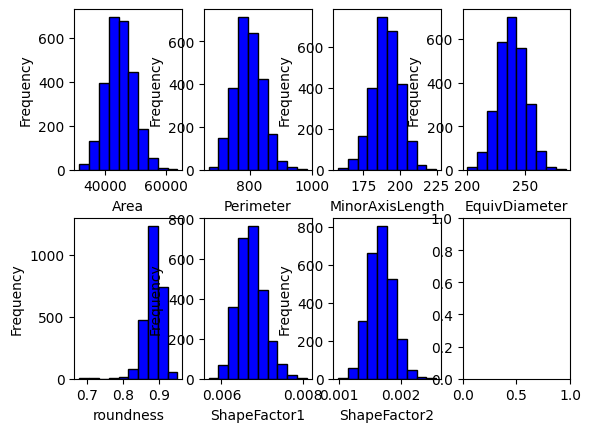

In [ ]:
SIRA_col = ['Area','Perimeter','MinorAxisLength','EquivDiameter','roundness','ShapeFactor1','ShapeFactor2']
# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=4)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(SIRA_col):
  axes[i].hist(subset_SIRA[col], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

In [ ]:
#fill the missing values in Area,Perimeter,MinorAxisLength,EquiDiameter,ShapeFactor1,ShapeFactor2 column of SIRA
# class with the mean values as distribution is normal
data.loc[subset_condition_SIRA, 'Area']= subset_SIRA['Area'].fillna(subset_SIRA['Area'].mean())
data.loc[subset_condition_SIRA, 'Perimeter']= subset_SIRA['Perimeter'].fillna(subset_SIRA['Perimeter'].mean())
data.loc[subset_condition_SIRA, 'MinorAxisLength']= subset_SIRA['MinorAxisLength'].fillna(subset_SIRA['MinorAxisLength'].mean())
data.loc[subset_condition_SIRA, 'EquivDiameter']= subset_SIRA['EquivDiameter'].fillna(subset_SIRA['EquivDiameter'].mean())
data.loc[subset_condition_SIRA, 'ShapeFactor2']= subset_SIRA['ShapeFactor2'].fillna(subset_SIRA['ShapeFactor2'].mean())
data.loc[subset_condition_SIRA,'ShapeFactor1'] = subset_SIRA['ShapeFactor1'].fillna(subset_SIRA['ShapeFactor1'].mean())
#fill the missing values in roundness column of SIRA with mean values as the distribution is skewed
data.loc[subset_condition_SIRA,'roundness'] = subset_SIRA['roundness'].fillna(subset_SIRA['roundness'].median())

In [ ]:
#checking the null values after filling
subset_SIRA = data.loc[subset_condition_SIRA]
subset_SIRA.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

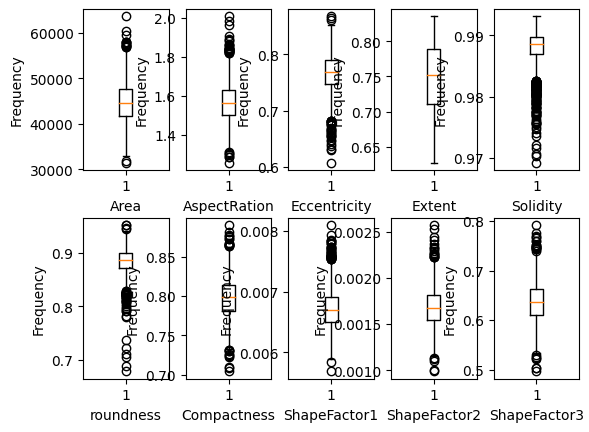

In [ ]:
column = ['Area', 'AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3']
fig, axes = plt.subplots(nrows=2, ncols=5)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(column):
  axes[i].boxplot(x=subset_SIRA[col])
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

**7. Find and replace the missing values in Class Type 'DERMASON'**

In [ ]:
subset_condition_DERMASON = data['Class']=='DERMASON'
subset_DERMASON = data.loc[subset_condition_DERMASON]
subset_DERMASON.isnull().sum()

Area                9
Perimeter          24
MajorAxisLength     0
MinorAxisLength    20
AspectRation        0
Eccentricity        0
ConvexArea          0
EquivDiameter       0
Extent             10
Solidity            0
roundness          34
Compactness         0
ShapeFactor1       46
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
Class               0
dtype: int64

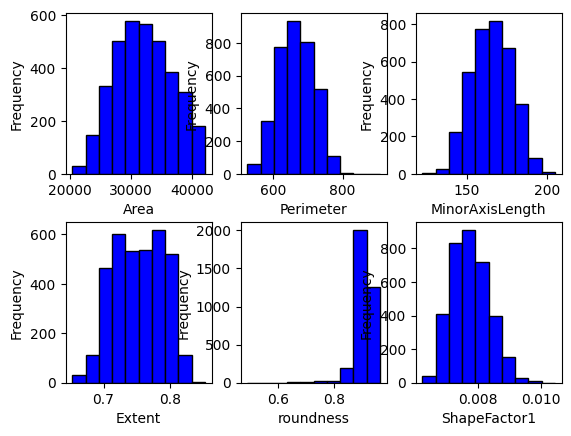

In [ ]:
DERMASON_col = ['Area','Perimeter','MinorAxisLength','Extent','roundness','ShapeFactor1']
# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(DERMASON_col):
  axes[i].hist(subset_DERMASON[col], bins=10, color='blue', edgecolor='black')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

In [ ]:
#fill the missing values in Area,Perimeter,MinorAxisLength, column of DERMASON
# class with the mean values as distribution is normal
data.loc[subset_condition_DERMASON, 'Area']= subset_DERMASON['Area'].fillna(subset_DERMASON['Area'].mean())
data.loc[subset_condition_DERMASON, 'Perimeter']= subset_DERMASON['Perimeter'].fillna(subset_DERMASON['Perimeter'].mean())
data.loc[subset_condition_DERMASON, 'MinorAxisLength']= subset_DERMASON['MinorAxisLength'].fillna(subset_DERMASON['MinorAxisLength'].mean())

#fill the missing values in roundness,Extene,ShapeFactor1 column of DERMASON with median values as the distribution is skewed
data.loc[subset_condition_DERMASON,'Extent'] = subset_DERMASON['Extent'].fillna(subset_DERMASON['Extent'].median())
data.loc[subset_condition_DERMASON,'roundness'] = subset_DERMASON['roundness'].fillna(subset_DERMASON['roundness'].median())
data.loc[subset_condition_DERMASON,'ShapeFactor1'] = subset_DERMASON['ShapeFactor1'].fillna(subset_DERMASON['ShapeFactor1'].median())

In [ ]:
#checking the null values after filling
subset_DERMASON = data.loc[subset_condition_DERMASON]
subset_DERMASON.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

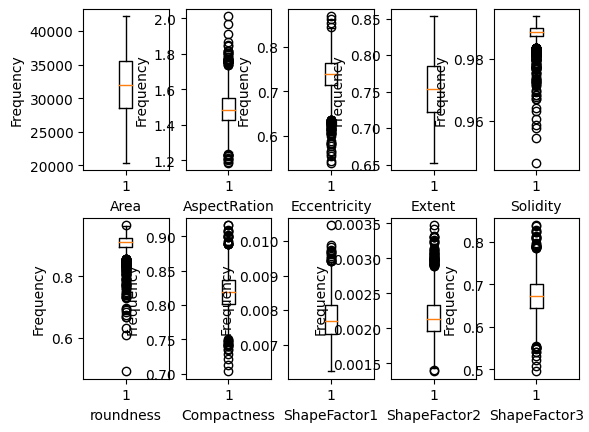

In [ ]:
column = ['Area', 'AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3']
fig, axes = plt.subplots(nrows=2, ncols=5)
# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()
for i,col in enumerate(column):
  axes[i].boxplot(x=subset_DERMASON[col])
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
plt.subplots_adjust(hspace=0.3)

In [ ]:
#null values of entire dataset
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

In [ ]:
# Display the mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


Text(0.5, 1.0, 'Correlation Heatmap')

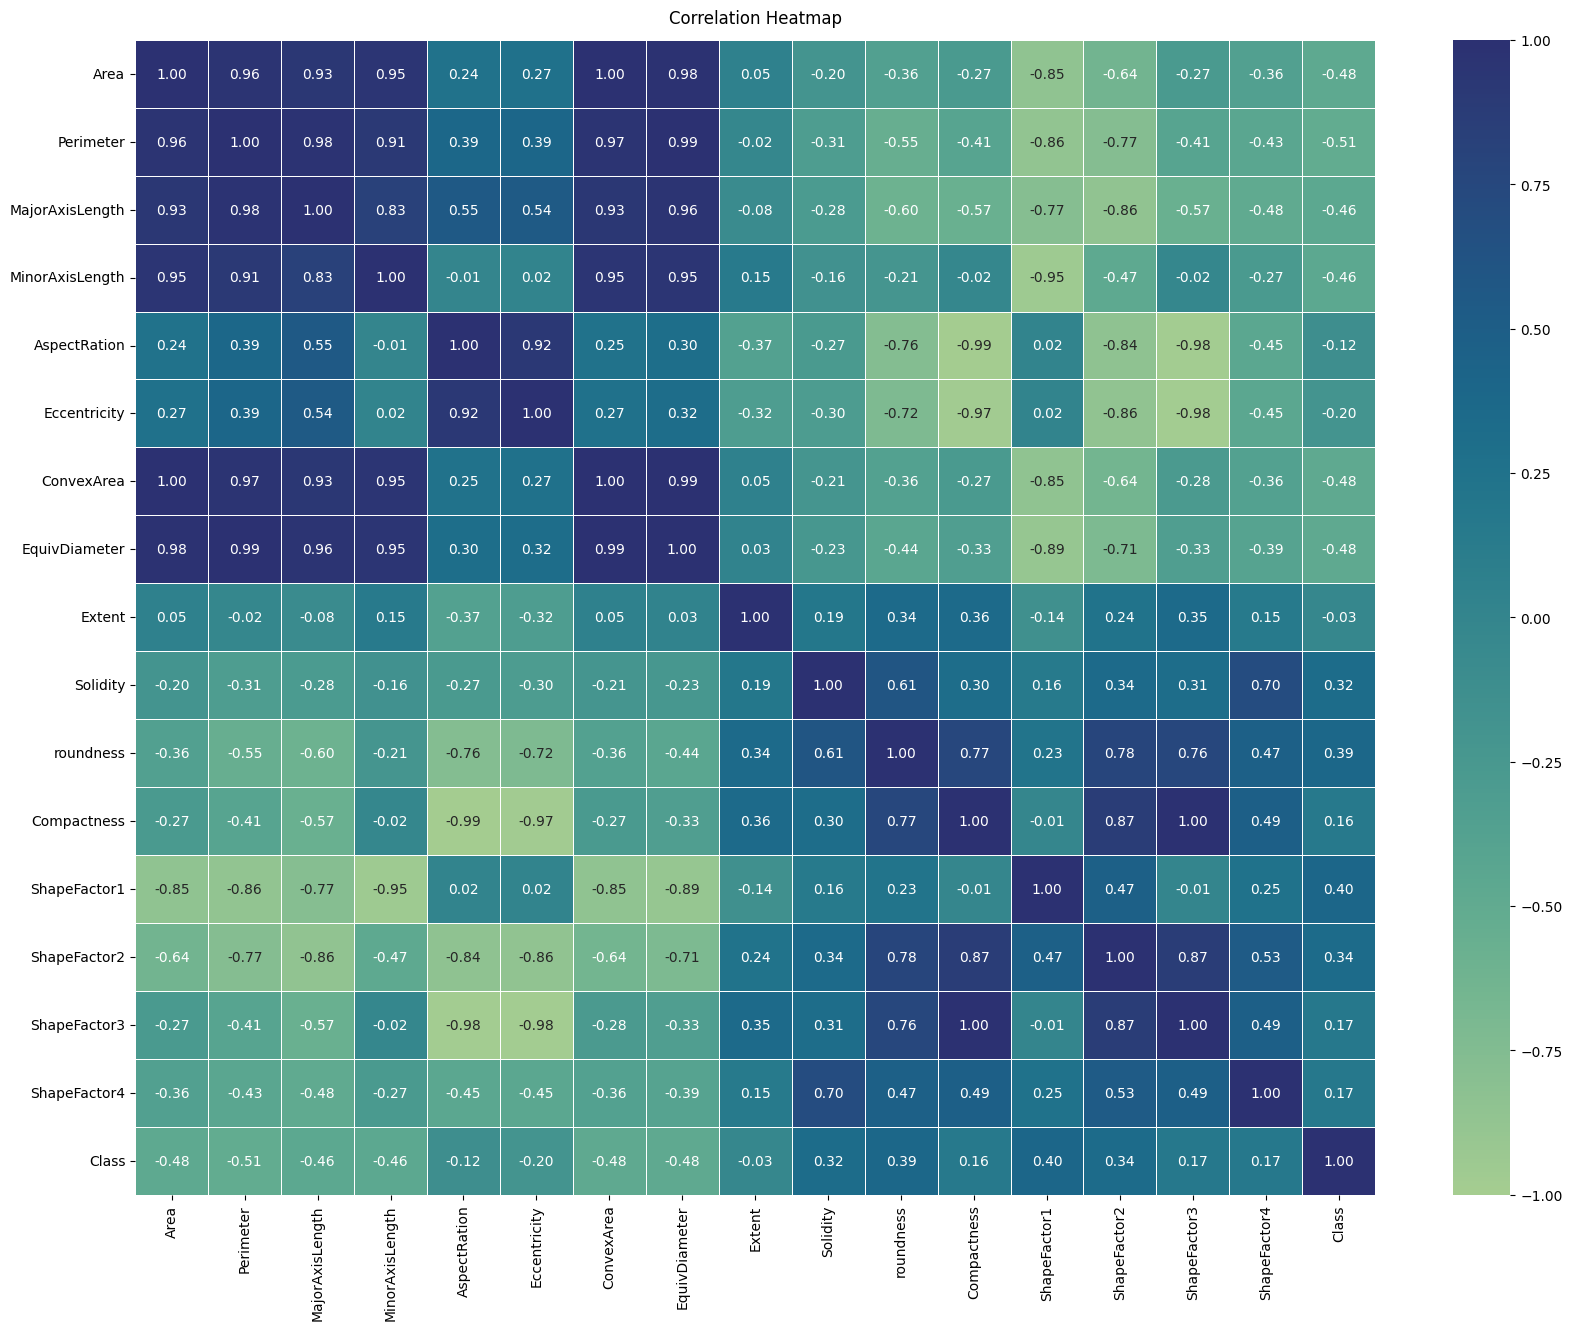

In [ ]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest" )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
#the below function will select highly correlated features
#it will remove the first feature that is corelated with any other feature

def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j]>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(data,0.95)
len(set(corr_features))

6

In [ ]:
#below columns can be deleted based on high corelation with other features
corr_features

{'ConvexArea',
 'EquivDiameter',
 'MajorAxisLength',
 'MinorAxisLength',
 'Perimeter',
 'ShapeFactor3'}

In [ ]:
data.drop(columns=['ConvexArea', 'EquivDiameter', 'MajorAxisLength', 'MinorAxisLength','ShapeFactor3','Perimeter'],inplace = True)

In [ ]:
data.head()


,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
0,28395.0,1.197191,0.549812,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.998724,5
1,28734.0,1.097356,0.411785,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.998430,5
2,29380.0,1.209713,0.562727,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.999066,5
3,30008.0,1.153638,0.498616,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.994199,5
4,30140.0,1.060798,0.333680,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.999166,5


In [ ]:
#outliers for Area columns
q1 = np.percentile(data['Area'],25,method="midpoint")
q2 = np.percentile(data['Area'],50,method="midpoint")
q3 = np.percentile(data['Area'],75,method="midpoint")
iqr = q3- q1
outlier=[]
up_lim = q3+ 1.5*iqr
low_lim = q1-1.5*iqr
for x in data['Area']:
  if (x<low_lim) or (x>up_lim):
    outlier.append(x)
print ('No. of outliers in Area column:', len(outlier))
outlier.sort()
print (outlier)


No. of outliers in Area column: 546
[99804.0, 100376.0, 100635.0, 100725.0, 100962.0, 100983.0, 101226.0, 101496.0, 101815.0, 102108.0, 102300.0, 102525.0, 103602.0, 103801.0, 103899.0, 105090.0, 106064.0, 106700.0, 106806.0, 107911.0, 114004.0, 114858.0, 115608.0, 115967.0, 116272.0, 117034.0, 126503.0, 128118.0, 129409.0, 129807.0, 130070.0, 131249.0, 131488.0, 132254.0, 137115.0, 137358.0, 137518.0, 137748.0, 137890.0, 138059.0, 138114.0, 138244.0, 138265.0, 138659.0, 138777.0, 138976.0, 139523.0, 139639.0, 139686.0, 139841.0, 140313.0, 140867.0, 140964.0, 141385.0, 141519.0, 141850.0, 141953.0, 142154.0, 142238.0, 142399.0, 142592.0, 143603.0, 144058.0, 144079.0, 144083.0, 144404.0, 144458.0, 144704.0, 145163.0, 145285.0, 145339.0, 145886.0, 146007.0, 146015.0, 146153.0, 146154.0, 146328.0, 146521.0, 146618.0, 146862.0, 146976.0, 147030.0, 147044.0, 147218.0, 147288.0, 147827.0, 147930.0, 148325.0, 148827.0, 148931.0, 149231.0, 149264.0, 149462.0, 149824.0, 149941.0, 150168.0, 1501

In [ ]:
data.shape
col = 13611

In [ ]:
print('Percentage of Area outliers = ',(len(outlier)/col)*100,'%')

Percentage of Area outliers =  4.011461318051576 %


In [ ]:
#outliers for Aspect Ration columns
q1 = np.percentile(data['AspectRation'],25,method="midpoint")
q2 = np.percentile(data['AspectRation'],50,method="midpoint")
q3 = np.percentile(data['AspectRation'],75,method="midpoint")
iqr = q3- q1
outlier_ar=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['AspectRation']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_ar.append(x)
print ('No. of outliers in Aspect Ration column:', len(outlier_ar))
print (outlier_ar)

No. of outliers in Aspect Ration column: 473
[2.166477186248498, 2.1524699818840998, 2.1812834868781654, 2.1434988880786263, 2.126984620159503, 2.1953874202129704, 2.138828788342149, 2.2152136789832144, 2.2237677201650166, 2.2237677201650166, 2.1194699887020727, 2.248802775404619, 2.2013743451276535, 2.19841763880738, 2.1671335653288493, 2.1849414766483664, 2.1304425133384535, 2.184190340091777, 2.139892934427029, 2.2187808655142556, 2.1701714736122786, 2.1682433870747646, 2.272915991914629, 2.1898733665550623, 2.1642112119298256, 2.1642112119298256, 2.1502227732100523, 2.1253416441063027, 2.2740265720191815, 2.2941860721901937, 2.193720931712487, 2.133454678959761, 2.3204538609699865, 2.166737278612454, 2.1928688504567417, 2.2603851983122816, 2.1512456169665417, 2.1905093737113255, 2.2011906409077633, 2.2145332097297397, 2.2104893533068184, 2.1986613771527024, 2.158990866792197, 2.2597895415112093, 2.129650330480505, 2.218389064253332, 2.1966064058758126, 2.2323391173192726, 2.1864425

In [ ]:
print('Percentage of Aspect Ratio outliers = ',(len(outlier_ar)/col)*100,'%')

Percentage of Aspect Ratio outliers =  3.475130409227831 %


In [ ]:
#outliers for Eccentricity columns
q1 = np.percentile(data['Eccentricity'],25,method="midpoint")
q2 = np.percentile(data['Eccentricity'],50,method="midpoint")
q3 = np.percentile(data['Eccentricity'],75,method="midpoint")
iqr = q3- q1
outlier_e=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['Eccentricity']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_e.append(x)
print ('No. of outliers in Eccentricity column:', len(outlier_e))
print (outlier_e)

No. of outliers in Eccentricity column: 834
[0.5498121871383472, 0.41178525136724037, 0.5627273167504117, 0.49861597640271654, 0.333679657773177, 0.5204006602912636, 0.489477894457261, 0.5137595579635882, 0.5109468292276196, 0.46988349421480546, 0.5275867100642196, 0.5609945201182606, 0.4755356415256237, 0.5212683904221279, 0.40284197357438384, 0.49626328085462607, 0.5460726275575238, 0.558465259169797, 0.4582865610047274, 0.4941383413794608, 0.4517054385526524, 0.4369684316743807, 0.42130237662827663, 0.43420694028297246, 0.48544352010113206, 0.4809714696790997, 0.5642361269313905, 0.5043817530986666, 0.5477843665607328, 0.5609755664601539, 0.5442895095369215, 0.539747142543915, 0.5369189075061798, 0.5599415175975334, 0.5031437256875972, 0.48914996706203917, 0.5415309049908621, 0.5391743277590498, 0.5427019393429459, 0.511456520670891, 0.5182614078472965, 0.534673643692279, 0.532696426660149, 0.5270196045494587, 0.5666030911163334, 0.48309517204946983, 0.5683178518575858, 0.5555438328

In [ ]:
print('Percentage of Eccentricity outliers = ',(len(outlier_e)/col)*100,'%')

Percentage of Eccentricity outliers =  6.127396958342517 %


In [ ]:
#outliers for Extent columns
q1 = np.percentile(data['Extent'],25,method="midpoint")
q2 = np.percentile(data['Extent'],50,method="midpoint")
q3 = np.percentile(data['Extent'],75,method="midpoint")
iqr = q3- q1
outlier_ex=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['Extent']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_ex.append(x)
print ('No. of outliers in Extent column:', len(outlier_ex))
print (outlier_ex)

No. of outliers in Extent column: 275
[0.6070210425984309, 0.6046026952083223, 0.6028067056134112, 0.6052161654135338, 0.6047430830039525, 0.5894305307096005, 0.6122263336416898, 0.6131016619900712, 0.6133140596469873, 0.5984478935698447, 0.6129311373672276, 0.6148158086974671, 0.6019558079178675, 0.6091972370559554, 0.6093884582256676, 0.6093884582256676, 0.5998456790123456, 0.600481900862129, 0.6145664707051773, 0.6135114126210162, 0.599324789858068, 0.5740403640680649, 0.5919605305726302, 0.5849111333790412, 0.5938440950150552, 0.60396267867314, 0.6118800461361015, 0.577532299741602, 0.6160763468106203, 0.615909090909091, 0.6080109093826038, 0.6080109093826038, 0.6130158133540956, 0.6088212334113974, 0.6054689509697999, 0.6057264759554836, 0.6034681046820691, 0.6039549539185234, 0.5997390290868552, 0.6023448205856976, 0.6000884843888257, 0.6084326541073946, 0.6035476046088538, 0.6041619343277554, 0.6107153760048845, 0.5914987714987715, 0.5990567793980763, 0.6134120035528486, 0.60641

In [ ]:
print('Percentage of Extent outliers = ',(len(outlier_ex)/col)*100,'%')

Percentage of Extent outliers =  2.0204246565278083 %


In [ ]:
#outliers for Solidity columns
q1 = np.percentile(data['Solidity'],25,method="midpoint")
q2 = np.percentile(data['Solidity'],50,method="midpoint")
q3 = np.percentile(data['Solidity'],75,method="midpoint")
iqr = q3- q1
outlier_s=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['Solidity']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_s.append(x)
print ('No. of outliers in Solidity column:', len(outlier_s))
outlier_s.sort()
print (outlier_s.sort())

No. of outliers in Solidity column: 774
None


In [ ]:
print('Percentage of Solidity  outliers = ',(len(outlier_s)/col)*100,'%')

Percentage of Solidity  outliers =  5.715965028285945 %


In [ ]:
#outliers for Roundness columns
q1 = np.percentile(data['roundness'],25,method="midpoint")
q2 = np.percentile(data['roundness'],50,method="midpoint")
q3 = np.percentile(data['roundness'],75,method="midpoint")
iqr = q3- q1
outlier_round=[]
up_lim_p = q3+ 1.5*iqr
low_lim_p = q1-1.5*iqr
for x in data['roundness']:
  if (x<low_lim_p) or (x>up_lim_p):
    outlier_round.append(x)
print ('No. of outliers in roundness column:', len(outlier_round))
outlier_round.sort()
print (outlier_round)

No. of outliers in roundness column: 99
[0.4896182562412148, 0.5567658261246129, 0.5718009102658749, 0.5760286618659178, 0.5778435944425948, 0.5937082798139443, 0.595048400707483, 0.6019785429609137, 0.6053993960924376, 0.6065696700065228, 0.6078674220045012, 0.6138357152218693, 0.6169930150083178, 0.6174090248475846, 0.6195170783230891, 0.6209834734977517, 0.6255190871466878, 0.6295179592508403, 0.6321216716985929, 0.6323213019356905, 0.6348414372091337, 0.6451633560497365, 0.6473226888964341, 0.6479298235069287, 0.6525189963777853, 0.6529276381820095, 0.6550032732006127, 0.6554797279639748, 0.6555842490229695, 0.6570054427045712, 0.6580739114539091, 0.663407035405507, 0.6638297831855647, 0.6645376620098078, 0.6646112809658365, 0.6661207460607145, 0.6665597592827553, 0.6667841185450788, 0.6689900421750882, 0.6690009758027194, 0.6693361987597369, 0.66997543587687, 0.6706887653386358, 0.6714280875937274, 0.6720027656275069, 0.6725684964755816, 0.6747523053553952, 0.6750966636066105, 0.6

In [ ]:
print('Percentage of roundness  outliers = ',(len(outlier_round)/col)*100,'%')

Percentage of roundness  outliers =  0.727352876350011 %


In [ ]:
#outliers for Compactness columns
q1 = np.percentile(data['Compactness'],25,method="midpoint")
q2 = np.percentile(data['Compactness'],50,method="midpoint")
q3 = np.percentile(data['Compactness'],75,method="midpoint")
iqr = q3- q1
outlier_compact=[]
up_lim = q3+ 1.5*iqr
low_lim = q1-1.5*iqr
for x in data['Compactness']:
  if (x<low_lim) or (x>up_lim):
    outlier_compact.append(x)
print ('No. of outliers in Compactness column:', len(outlier_compact))
outlier_compact.sort()
print (outlier_compact)

No. of outliers in Compactness column: 109
[0.9538608422605129, 0.970515523241471, 0.9452543046697849, 0.956197484655159, 0.9441932316015749, 0.9480382740643168, 0.9512671411221948, 0.948189147230393, 0.9474071152943043, 0.9527275664584394, 0.9767388404681284, 0.9444208494032682, 0.9755945071290275, 0.9462233977613496, 0.9441947975637394, 0.9668687173562497, 0.9631763824932791, 0.9518531776066903, 0.9471765877360451, 0.946716152533979, 0.9446918648358964, 0.9419909313659213, 0.9460670070412068, 0.9661887105859747, 0.9513709628039183, 0.9424114137218325, 0.9463559232599003, 0.9463204879416004, 0.9478728032817132, 0.9545665996032351, 0.9486653988587289, 0.9606932246629324, 0.9643539548705158, 0.9628737692013742, 0.9657052305913923, 0.9516213404417485, 0.9500016158155078, 0.9636260552625932, 0.9460300994746179, 0.9687330659932076, 0.949718791552737, 0.9873029693778109, 0.96223079230429, 0.9419752357039505, 0.9445284665857168, 0.9539294237609569, 0.9500725437217288, 0.9538553801516736, 0.9

In [ ]:
print('Percentage of compactness  outliers = ',(len(outlier_compact)/col)*100,'%')

Percentage of compactness  outliers =  0.8008228638601131 %


In [ ]:
#outliers for Shape Factor1 columns
q1 = np.percentile(data['ShapeFactor1'],25,method="midpoint")
q2 = np.percentile(data['ShapeFactor1'],50,method="midpoint")
q3 = np.percentile(data['ShapeFactor1'],75,method="midpoint")
iqr = q3- q1
outlier_shape1=[]
up_lim = q3+ 1.5*iqr
low_lim = q1-1.5*iqr
for x in data['ShapeFactor1']:
  if (x<low_lim) or (x>up_lim):
    outlier_shape1.append(x)
print ('No. of outliers in ShapeFactor1 column:', len(outlier_shape1))
outlier_shape1.sort()
print (outlier_shape1)

No. of outliers in ShapeFactor1 column: 532
[0.0027780126683855494, 0.0028557163801240645, 0.002860119994240478, 0.0028783573238137386, 0.00290186065872483, 0.002909100875845017, 0.0029424546663128185, 0.0029593169361100077, 0.0029744233565702285, 0.0029849434345394148, 0.002995856920249932, 0.002998048496966107, 0.002998227143461799, 0.0030031279189839475, 0.003009976268879494, 0.003024556368899149, 0.003030710197479155, 0.0030318550123681347, 0.003046933977695801, 0.0030496280849559043, 0.0030500538956834823, 0.0030524920073750936, 0.003069711313374683, 0.0030718848451533197, 0.0030800669625052975, 0.0030827519974942694, 0.003084801501554359, 0.003086693751187786, 0.0031037031141107176, 0.003104993931897318, 0.0031109895971895883, 0.003113552901488066, 0.003115884754296674, 0.0031164058830687367, 0.0031200136547230983, 0.0031252993370199035, 0.0031264403850325556, 0.003128015233084004, 0.003132538071920416, 0.003132794972278033, 0.0031340014348216275, 0.003137111543481172, 0.00313719

In [ ]:
print('Percentage of Shape Factor 1  outliers = ',(len(outlier_shape1)/col)*100,'%')

Percentage of Shape Factor 1  outliers =  3.9306443317904636 %


In [ ]:
#outliers for Shape Factor2 columns
q1 = np.percentile(data['ShapeFactor2'],25,method="midpoint")
q2 = np.percentile(data['ShapeFactor2'],50,method="midpoint")
q3 = np.percentile(data['ShapeFactor2'],75,method="midpoint")
iqr = q3- q1
outlier_shape2=[]
up_lim = q3+ 1.5*iqr
low_lim = q1-1.5*iqr
for x in data['ShapeFactor2']:
  if (x<low_lim) or (x>up_lim):
    outlier_shape2.append(x)
print ('No. of outliers in ShapeFactor2 column:', len(outlier_shape2))
outlier_shape2.sort()
print (outlier_shape2)

No. of outliers in ShapeFactor2 column: 0
[]


In [ ]:
#outliers for Shape Factor4 columns
q1 = np.percentile(data['ShapeFactor4'],25,method="midpoint")
q2 = np.percentile(data['ShapeFactor4'],50,method="midpoint")
q3 = np.percentile(data['ShapeFactor4'],75,method="midpoint")
iqr = q3- q1
outlier_shape4=[]
up_lim = q3+ 1.5*iqr
low_lim = q1-1.5*iqr
for x in data['ShapeFactor4']:
  if (x<low_lim) or (x>up_lim):
    outlier_shape4.append(x)
print ('No. of outliers in Shape Factor 4 column:', len(outlier_shape4))
outlier_shape4.sort()
print (outlier_shape4)

No. of outliers in Shape Factor 4 column: 758
[0.9499903110044127, 0.9512388356770621, 0.9550324897257788, 0.9568668573555503, 0.9572326629648125, 0.9573251075022674, 0.9573275531887498, 0.9577477086549809, 0.9582848251357425, 0.9607024335930074, 0.9614838168686448, 0.9615713434998912, 0.9617509883267907, 0.962081827340231, 0.9625685515912553, 0.9628894641835953, 0.9631237872347759, 0.9636554346182158, 0.9637797063789667, 0.9644486125345619, 0.9662801539609054, 0.9663493066146329, 0.9667759079690562, 0.9668866231308479, 0.9670382775388258, 0.9675466884671292, 0.967631233464847, 0.9678794477129048, 0.9678905869983842, 0.9684033711454992, 0.9684738120014627, 0.9686078435856753, 0.9688421203490779, 0.9690388629894223, 0.9690399692906774, 0.9692792071717358, 0.969410321019883, 0.969540465592229, 0.9696636290764395, 0.970209791545642, 0.9706093608588663, 0.9708548809739709, 0.9708937020532148, 0.9709373751430863, 0.9712279597845835, 0.971275240097633, 0.9714551823962103, 0.9715346188819589,

In [ ]:
print('Percentage of Shape Factor 4  outliers = ',(len(outlier_shape4)/col)*100,'%')

Percentage of Shape Factor 4  outliers =  5.635148042024833 %


In [ ]:
data[data['Solidity'] ==0.9192461570857022]

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
271,34924.0,1.422153,0.711032,0.712095,0.919246,0.658074,0.816318,0.007397,0.002026,0.947687,5


In [ ]:
data[data['roundness'] ==0.4896182562412148]

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
11907,32142.0,1.414845,0.707422,0.723495,0.946634,0.489618,0.830697,0.007577,0.002225,0.976325,3


In [ ]:
data[data['ShapeFactor1'] ==0.010451169324378654]

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
10144,23562.0,2.01,0.867457,0.698257,0.98343,0.790315,0.70337,0.010451,0.001578,0.994407,3


In [ ]:
data.drop([271,11907,10144],inplace = True)

In [ ]:
data.shape

(13541, 11)

In [ ]:
data.tail(100)

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
13511,40807.0,1.464275,0.730482,0.742080,0.991014,0.914034,0.824649,0.006774,0.001932,0.995775,3
13512,40813.0,1.469724,0.732841,0.801906,0.991160,0.926616,0.823385,0.006783,0.001923,0.996418,3
13513,40834.0,1.485832,0.739621,0.747109,0.989316,0.911438,0.819198,0.006816,0.001894,0.997121,3
13514,40851.0,1.518029,0.752363,0.805899,0.990663,0.927397,0.810514,0.006888,0.001834,0.997244,3
13515,40869.0,1.556984,0.766481,0.731633,0.989396,0.893116,0.799862,0.006978,0.001762,0.996127,3
...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,1.552728,0.765002,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.998385,3
13607,42101.0,1.476439,0.735702,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.998219,3
13608,42139.0,1.472582,0.734065,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.996767,3
13609,42147.0,1.489326,0.741055,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.995222,3


In [ ]:
# y is the dependent variable
y = data['Class']
#X holds all the independent variables
X = data.drop(['Class'],axis =1)

In [ ]:
X.head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,28395.0,1.197191,0.549812,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.998724
1,28734.0,1.097356,0.411785,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.998430
2,29380.0,1.209713,0.562727,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.999066
3,30008.0,1.153638,0.498616,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.994199
4,30140.0,1.060798,0.333680,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.999166


In [ ]:
y.iloc[4]

5

In [ ]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
X_data = sscaler.fit_transform(X)
#X_data = pd.DataFrame(X_data,columns=['Area','AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor4'])


In [ ]:
pip install --upgrade scikit-learn==1.3.2

In [ ]:
# Save the scaler
joblib.dump(sscaler, 'stdscaler_G.pkl')

['stdscaler_G.pkl']

In [ ]:
# Save the scaled data
joblib.dump(X_data, 'scaled_data.pkl')

['scaled_data.pkl']

In [ ]:
type(X_data)

numpy.ndarray

In [ ]:
X_data

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,-0.839295,-1.565292,-2.186737,0.287922,0.368715,1.424176,1.838501,0.688679,2.397567,0.841743
1,-0.827786,-1.972334,-3.691092,0.697491,-0.472664,0.225551,2.497419,0.375188,3.096413,0.773865
2,-0.805855,-1.514241,-2.045975,0.577865,0.521490,1.252340,1.763935,0.610854,2.230456,0.920879
3,-0.784536,-1.742866,-2.744724,0.671198,-2.274782,0.510930,2.082056,0.409011,2.510489,-0.204555
4,-0.780054,-2.121388,-4.542365,0.475395,0.811589,1.877499,2.768364,0.124954,3.266533,0.943983
...,...,...,...,...,...,...,...,...,...,...
13536,-0.374128,-0.115718,0.158619,-0.720354,0.689413,0.724790,0.024701,0.268417,0.050604,0.763441
13537,-0.373992,-0.426759,-0.160721,1.023887,0.780804,0.816168,0.356364,0.117052,0.280132,0.724920
13538,-0.372702,-0.442487,-0.178568,-0.406559,0.595397,0.755535,0.364133,0.110925,0.284220,0.389324
13539,-0.372430,-0.374217,-0.102384,-0.908024,0.141891,0.577959,0.278362,0.148643,0.223380,0.032120


**Split the data into test- and -train**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score, precision_score
from sklearn.utils import class_weight

# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X_data,y, test_size=0.20,random_state =42)

# As the data is imbalanced, Calculate class weights
# Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira beans
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([1.46398162, 3.81140042, 1.17764731, 0.54143757, 1.03854267,
       0.95994328, 0.73862939])

**Logistic Regression**

In [ ]:
# Create and train logistic regression model with class weights
#Logistic Regression
model_lr = LogisticRegression(max_iter = 600,
                              class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2],
                                            3: class_weights[3],4: class_weights[4], 5: class_weights[5],6: class_weights[6]})
#C=10, multi_class='auto',
#fit the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_prediction_lr = model_lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_prediction_lr))
print('Accuracy using Logistic Regression =',accuracy_score(y_test,y_prediction_lr))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       265
           1       1.00      1.00      1.00       116
           2       0.94      0.92      0.93       316
           3       0.94      0.86      0.90       686
           4       0.94      0.97      0.96       371
           5       0.93      0.96      0.95       414
           6       0.85      0.89      0.87       541

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

Accuracy using Logistic Regression = 0.9184200812107789


**Fine Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = { 'C': [0.001,  1, 10, 100],
              'multi_class':['ovr','auto']}

# Set up GridSearchCV
grid_search_lr = GridSearchCV(model_lr, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_lr.best_params_

print(best_params)

# Evaluate the model on the test set
lr_model = grid_search_lr.best_estimator_
test_accuracy = lr_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Print classification report
# print(classification_report(y_test, y_pred))

print(" Accuracy Score of KNN model = ",accuracy_score(y_test,y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 100, 'multi_class': 'auto'}
Test Accuracy: 0.9198966408268734
 Accuracy Score of KNN model =  0.9198966408268734


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
best_params

{'C': 10, 'multi_class': 'auto'}

**KNN model prediction**

In [ ]:
#KNN model
#predicting with 12 neighbors
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

#K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  model_knn = classifier.fit(X_train,y_train)
  y_prediction_knn = model_knn.predict(X_test)
  acc = accuracy_score(y_test,y_prediction_knn)
  print('Neighbor',k,'= :',acc)
  metric_k.append(acc)

Neighbor 3 = : 0.9224806201550387
Neighbor 4 = : 0.9250645994832042
Neighbor 5 = : 0.9272794389073459
Neighbor 6 = : 0.9243263196751569
Neighbor 7 = : 0.9254337393872277
Neighbor 8 = : 0.9276485788113695
Neighbor 9 = : 0.9269102990033222
Neighbor 10 = : 0.9276485788113695
Neighbor 11 = : 0.9306016980435585
Neighbor 12 = : 0.9302325581395349
Neighbor 13 = : 0.9283868586194167
Neighbor 14 = : 0.9306016980435585


Plotting the Accuracy score with No. of neighbours

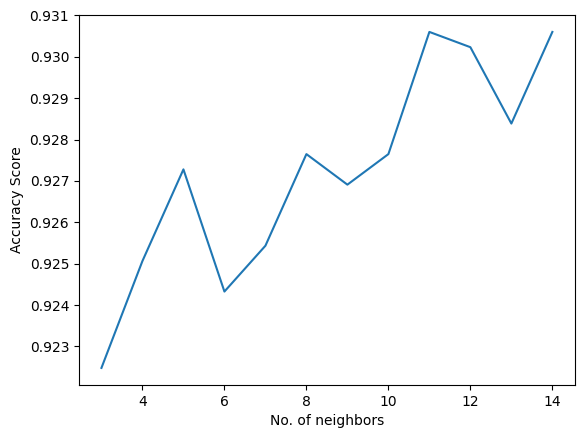

In [ ]:
plt.plot(neighbors,metric_k,)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')
plt.show()

**Fine Tuning - KNN**

In [ ]:
#predicting with 11 neighbors and Fine tuning
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights for imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Use RandomOverSampler to handle class imbalance
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

param_grid = { 'weights': ['uniform', 'distance']}
# Create the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=11, algorithm='auto', metric='euclidean', p=2,
                                      metric_params=None, n_jobs=None)
grid_search = GridSearchCV(estimator=knn_classifier,  cv=6, scoring='accuracy',param_grid=param_grid)
# Fit the classifier with resampled data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model on the test set
knn_model = grid_search.best_estimator_
test_accuracy = knn_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_knn))

print(" Accuracy Score of KNN model = ",accuracy_score(y_test,y_pred_knn))

Best Parameters: {'weights': 'distance'}
Test Accuracy: 0.9250645994832042
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       265
           1       1.00      1.00      1.00       116
           2       0.94      0.94      0.94       316
           3       0.95      0.88      0.91       686
           4       0.96      0.96      0.96       371
           5       0.93      0.96      0.94       414
           6       0.86      0.91      0.88       541

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709

 Accuracy Score of KNN model =  0.9250645994832042


In [ ]:
input_array = [-0.940191,-0.275536,0.002127,0.287712,0.122395,0.731220,0.197488,1.913550,1.044772,0.936152]
# input_array = [-0.87725,-0.868299,-0.740948,-0.009451,0.161625,1.049207,0.876033,1.281126,1.523705,0.735827]

# Feature names corresponding to each column
feature_names = ['Area','AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor4']

arr = np.array(input_array).reshape(1, -1)

# Set feature names for input data (if available)
input_data_with_names = pd.DataFrame(arr, columns=feature_names)
input_data_with_names
prediction = knn_classifier.predict(input_data_with_names)

prediction


array([3])

In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
y_test

10650    3
10323    3
12410    3
1431     5
12681    3
        ..
9205     6
13278    3
13557    3
3324     0
6455     4
Name: Class, Length: 2709, dtype: int64

**SVM model**

In [ ]:
from sklearn.svm import SVC
svm_cls = SVC(class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2],
                                            3: class_weights[3],4: class_weights[4], 5: class_weights[5],6: class_weights[6]})
svm = svm_cls.fit(X_train,y_train)
y_prediction_svm = svm.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_prediction_svm))

Accuracy Score 0.9294942783314877


In [ ]:
# Define the hyperparameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],                # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Kernel type
    'gamma': [0.01, 0.1, 1],           # Kernel coefficient (for 'rbf' and 'poly')
}

# Create GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
model_svm = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_svm = model_svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_svm))

# Evaluate the performance of the best model

print(f"Best Parameters: {best_params}")
print(" Accuracy Score of SVM model = ",accuracy_score(y_test,y_pred_svm))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       265
           1       1.00      1.00      1.00       116
           2       0.96      0.94      0.95       316
           3       0.94      0.89      0.91       686
           4       0.96      0.96      0.96       371
           5       0.93      0.97      0.95       414
           6       0.87      0.89      0.88       541

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
 Accuracy Score of SVM model =  0.9298634182355112


In [ ]:
from sklearn.svm import SVC
svm_cls = SVC(C=10, kernel='rbf')
#,class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2],
                                           # 3: class_weights[3],4: class_weights[4], 5: class_weights[5],6: class_weights[6]}
best_svm_model = svm_cls.fit(X_train,y_train)
y_prediction_best_svm = best_svm_model.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_prediction_best_svm))

Accuracy Score 0.9365079365079365


In [ ]:
#input_array = [-0.940191,-0.275536,0.002127,0.287712,0.122395,0.731220,0.197488,1.913550,1.044772,0.936152]
#input_array = [-0.87725,-0.868299,-0.740948,-0.009451,0.161625,1.049207,0.876033,1.281126,1.523705,0.735827]
input_array = [1.120777,	-0.121437,	0.153272	,-1.111752,	-1.170910	,-0.631665	,0.022033,	-1.564179,	-0.834059,	0.460548]
# Feature names corresponding to each column
feature_names = ['Area','AspectRation','Eccentricity','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor4']

arr = np.array(input_array).reshape(1, -1)

# Set feature names for input data (if available)
input_data_with_names = pd.DataFrame(arr, columns=feature_names)
input_data_with_names
prediction = best_svm_model.predict(input_data_with_names)

prediction

array([0])

**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2],
                                            3: class_weights[3],4: class_weights[4], 5: class_weights[5],6: class_weights[6]})
dt = dt_classifier.fit(X_train,y_train)
y_prediction_dt = dt.predict(X_test)
print(accuracy_score(y_test,y_prediction_dt))

0.9091915836101883


**Fine tuning**

In [ ]:


# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Create a DecisionTreeClassifier
#dt_classifier = DecisionTreeClassifier(class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2],
                                           # 3: class_weights[3],4: class_weights[4], 5: class_weights[5],6: class_weights[6]})

# Create GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the model

grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Access the best parameters and best score
model_DT =  grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_


# Predict on the test set using the best model
y_pred_dt = model_DT.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_dt))

print(" Accuracy Score of Decision Tree  model = ",accuracy_score(y_test,y_pred_dt))
print("Best Parameters:", best_params)


              precision    recall  f1-score   support

           0       0.91      0.94      0.93       265
           1       1.00      1.00      1.00       116
           2       0.94      0.91      0.92       316
           3       0.92      0.87      0.90       686
           4       0.93      0.95      0.94       371
           5       0.92      0.96      0.94       414
           6       0.85      0.88      0.86       541

    accuracy                           0.91      2709
   macro avg       0.92      0.93      0.93      2709
weighted avg       0.91      0.91      0.91      2709

 Accuracy Score of Decision Tree  model =  0.9121447028423773
Best Parameters: {'criterion': 'gini', 'max_depth': 10}


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier( random_state=42,class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2], 3: class_weights[3],4: class_weights[4], 5: class_weights[5],6: class_weights[6]})
model_rf = rf_cls.fit(X_train,y_train)
y_prediction_rf = model_rf.predict(X_test)

In [ ]:
print(" Accuracy Score of Random Forest Model =",accuracy_score(y_test,y_prediction_rf))

 Accuracy Score of Random Forest Model = 0.9198966408268734


**Fine - Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],

}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, scoring='accuracy', cv=5)

# Fit the model
grid_search.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Access the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Best Accuracy: 0.9287299929565492


In [ ]:
rf_cls = RandomForestClassifier(criterion='gini',max_features='sqrt', n_estimators = 100, max_depth=20, random_state=42,class_weight={0: class_weights[0], 1: class_weights[1],2: class_weights[2], 3: class_weights[3],4: class_weights[4], 5: class_weights[5],6: class_weights[6]})
model_rf = rf_cls.fit(X_train,y_train)
y_prediction_rf = model_rf.predict(X_test)
print(" Accuracy Score of Random Forest Model =",accuracy_score(y_test,y_prediction_rf))

 Accuracy Score of Random Forest Model = 0.923218899963086


In [ ]:
import pickle

In [ ]:
pickle.dump(best_svm_model,open('best_svm_model.pkl','wb'))

In [ ]:
data.head(15)

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
0,28395.0,1.197191,0.549812,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.998724,5
1,28734.0,1.097356,0.411785,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.998430,5
2,29380.0,1.209713,0.562727,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.999066,5
3,30008.0,1.153638,0.498616,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.994199,5
4,30140.0,1.060798,0.333680,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.999166,5
5,30279.0,1.171067,0.520401,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.999236,5
6,30477.0,1.146768,0.489478,0.762402,0.984081,0.853080,0.933374,0.006359,0.003242,0.999049,5
7,30519.0,1.165591,0.513760,0.770682,0.989367,0.967109,0.925480,0.006359,0.003158,0.998345,5
8,39188.0,1.165852,0.588252,0.771561,0.988436,0.951599,0.925658,0.006359,0.003152,0.998953,5
9,39188.0,1.200834,0.588252,0.783683,0.990810,0.951599,0.912125,0.006359,0.003008,0.999061,5


In [ ]:
X_data.head(15)

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,-0.839295,-1.565292,-2.186737,0.287922,0.368715,1.424176,1.838501,0.688679,2.397567,0.841743
1,-0.827786,-1.972334,-3.691092,0.697491,-0.472664,0.225551,2.497419,0.375188,3.096413,0.773865
2,-0.805855,-1.514241,-2.045975,0.577865,0.521490,1.252340,1.763935,0.610854,2.230456,0.920879
3,-0.784536,-1.742866,-2.744724,0.671198,-2.274782,0.510930,2.082056,0.409011,2.510489,-0.204555
4,-0.780054,-2.121388,-4.542365,0.475395,0.811589,1.877499,2.768364,0.124954,3.266533,0.943983
5,-0.775335,-1.671806,-2.507293,0.528322,0.510844,1.184845,2.007175,0.411976,2.406782,0.960104
6,-0.768614,-1.770874,-2.844320,0.256845,-0.669234,-0.347710,2.164125,-0.175060,2.556573,0.916855
7,-0.767188,-1.694134,-2.579674,0.426027,0.479773,1.577514,2.035717,-0.175060,2.416025,0.754033
8,-0.472885,-1.693067,-1.767783,0.444000,0.277362,1.315653,2.038614,-0.175060,2.404719,0.894714
9,-0.472885,-1.550441,-1.767783,0.691661,0.793441,1.315653,1.818453,-0.175060,2.163828,0.919724


In [ ]:
pip install --upgrade scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import sklearn
import numpy

print("scikit-learn version:", sklearn.__version__)
print("NumPy version:", numpy.__version__)

scikit-learn version: 1.3.2
NumPy version: 1.23.5


In [ ]:
data_BARBUNYA_class.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2027,41487.0,815.900,299.046841,177.081490,1.688753,0.805826,42483,229.832306,0.689176,0.976555,0.783156,0.768550,0.007208,0.001551,0.590668,0.997493,BARBUNYA
2028,41488.0,759.552,283.142777,186.985489,1.514250,0.750920,42005,229.835076,0.708434,0.987692,0.903686,0.811729,0.006825,0.001828,0.658903,0.997744,BARBUNYA
2029,42012.0,809.770,266.700396,202.381088,1.317813,0.651285,43087,231.281949,0.770976,0.975050,0.805119,0.867198,0.006348,0.002215,0.752032,0.991037,BARBUNYA
2030,43122.0,838.186,296.404589,185.657600,1.596512,0.779530,44074,234.317382,0.731986,0.978400,0.771308,0.790532,0.006874,0.001656,0.624941,0.997726,BARBUNYA
2031,43145.0,799.426,273.402945,201.266886,1.358410,0.676813,43812,234.379863,0.766123,0.984776,0.848367,0.857269,0.006337,0.002111,0.734910,0.998309,BARBUNYA


In [ ]:
subset_condition_BOMBAY = data['Class']=='BOMBAY'
subset_BOMBAY = data.loc[subset_condition_BOMBAY]

In [ ]:
data.loc[subset_condition_BOMBAY].head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
3349,114004.0,1279.356,451.361256,323.747996,1.394175,0.696795,115298,380.991340,0.748987,0.988777,0.875280,0.844094,0.003959,0.001240,0.712495,0.993342,BOMBAY
3350,117034.0,1265.926,425.923787,351.215109,1.212715,0.565722,118019,386.021135,0.746319,0.991654,0.917710,0.906315,0.003639,0.001515,0.821407,0.996132,BOMBAY
3351,126503.0,1326.959,475.772459,339.381887,1.401879,0.700830,128220,401.333555,0.771313,0.986609,0.902809,0.843541,0.003761,0.001175,0.711561,0.997523,BOMBAY
3352,128118.0,1360.135,504.024964,325.678447,1.547615,0.763206,129274,403.887242,0.782247,0.991058,0.870274,0.801324,0.003934,0.001001,0.642120,0.993755,BOMBAY
3353,129409.0,1348.888,484.364424,341.172659,1.419705,0.709831,130688,405.917056,0.799334,0.990213,0.893763,0.838041,0.003743,0.001139,0.702312,0.997076,BOMBAY


In [ ]:
subset_condition_CALI = data['Class']=='CALI'
subset_CALI = data.loc[subset_condition_CALI]

In [ ]:
data.loc[subset_condition_CALI].head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class


In [ ]:
data.loc[subset_condition_HOROZ].head()

,Area,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
5501,33006.0,1.891548,0.848829,0.635476,0.989566,0.821636,0.724326,0.008575,0.001456,0.992396,4
5502,33263.0,1.711204,0.811477,0.672741,0.975226,0.807832,0.758444,0.008157,0.001665,0.984348,4
5503,33407.0,1.843209,0.840035,0.809867,0.982877,0.841715,0.732556,0.008427,0.001497,0.989137,4
5504,33518.0,1.798842,0.831240,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.996396,4
5506,33556.0,1.636498,0.791584,0.774072,0.990086,0.887506,0.781088,0.007886,0.001811,0.998425,4
